In [1]:
# IMDB 데이터셋 import

from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# nums_words = 10000은 가장 자주 나타나는 단어 1만개만 사용하겠다는 뜻이다.


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\as_th\anaconda3\envs\ai1\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\as_th\anaconda3\envs\ai1\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprec

In [2]:
print(train_data.shape)
print(test_data.shape)
print('train_data[0] : \n', train_data[0])
print('test_data[0] : \n', test_data[0])

print('train_labels[0] : \n',train_labels[0])
print('test_labels[0] : \n', test_labels[0]) # 부정 0 긍정 1

print(max([max(sequence) for sequence in train_data])) # 단어 만개 제한 9999로 만을 넘지 않는다.

(25000,)
(25000,)
train_data[0] : 
 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
test_data[0] : 
 [1, 591

In [16]:
# 정수 시퀀스를 이진 행렬로 인코딩하기

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # 크기가 (len(sequences), dimension)이고 모든 원소가 0인 행렬을 만든다.
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # results[i]에서 특정 인덱스의 위치를 1로 만든다.
    return results

x_train = vectorize_sequences(train_data) # 훈련 데이터 벡터로 변환
x_test = vectorize_sequences(test_data)

print(x_train[0])

# 레이블 -> 벡터로
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


[0. 1. 1. ... 0. 0. 0.]


In [17]:
from tensorflow.keras import models
from tensorflow.keras import layers


# 모델 정의
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# 모델 컴파일

model.compile(optimizer = 'rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])


In [18]:
# 옵티마이저 설정
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss = 'binary_crossentropy',
             metrics=['accuracy'])



In [19]:
# 손실과 측정을 함수 객체로 지정

from tensorflow.keras import losses
from tensorflow.keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [20]:
#  훈련 검증 세트 준비

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [21]:
# 모델 훈련

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))


Epoch 1/20
30/30 [==============================] - 2s 31ms/step - loss: 0.6095 - accuracy: 0.6813 - val_loss: 0.4042 - val_accuracy: 0.8661
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3417 - accuracy: 0.8998 - val_loss: 0.3192 - val_accuracy: 0.8853
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2463 - accuracy: 0.9267 - val_loss: 0.2848 - val_accuracy: 0.8890
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1901 - accuracy: 0.9435 - val_loss: 0.2905 - val_accuracy: 0.8814
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1557 - accuracy: 0.9552 - val_loss: 0.3211 - val_accuracy: 0.8731
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1253 - accuracy: 0.9625 - val_loss: 0.2931 - val_accuracy: 0.8827
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1024 - accuracy: 0.9730 - val_loss: 0.3127 - val_accuracy: 0.8792
Epoch 8/20
30

In [24]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

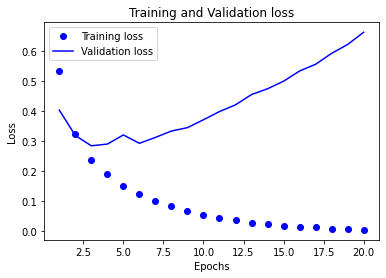

In [28]:

# 훈련 검증과 손실 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss') # bo는 파란 점을 의미
plt.plot(epochs, val_loss, 'b', label='Validation loss') # b는 파란 실선을 의미
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

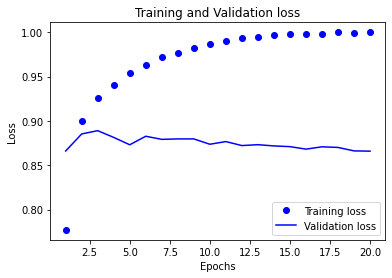

In [30]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs,acc, 'bo', label = 'Training loss') # bo는 파란 점을 의미
plt.plot(epochs, val_acc, 'b', label='Validation loss') # b는 파란 실선을 의미
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [32]:
# 모델 처음부터

# 모델 정의
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# 모델 컴파일

model.compile(optimizer = 'rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train,
         epochs = 4,
         batch_size=512)

result = model.evaluate(x_test, y_test)
print(result)

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.5555 - accuracy: 0.7300 0s - loss: 0.6482 - 
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2781 - accuracy: 0.9076
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2000 - accuracy: 0.9314
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3239 - accuracy: 0.8724: 0s - loss: 0.3
[0.32385683059692383, 0.8723599910736084]


In [34]:
# 훈련된 모델로 새로운 데이터에 대해 예측

model.predict(x_test)

array([[0.12834927],
       [0.99996364],
       [0.65502393],
       ...,
       [0.08834743],
       [0.04682142],
       [0.44812903]], dtype=float32)

In [ ]:
# 1개 또는 3개 은닉층 사용해보기

